In [19]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta, datetime
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import seaborn as sns

In [2]:
file = "C:/Users/Ryan/Desktop/airplane_crashes_and_fatalities_since_1908.csv"
df = pd.read_csv(file)

In [3]:
df.head()


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [4]:
df.shape

(5268, 13)

In [5]:
df.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [6]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [7]:
#Clean up time 
df["Time"] = df["Time"].replace(np.nan, "Unknown") 
df["Time"] = df["Time"].str.replace("114:20:00", "Unknown")
df["Time"] = df["Time"].str.replace("18.40", "18:40")
df["Time"] = df["Time"].str.replace("0943", "09:43")
df["Time"] = df["Time"].str.replace("12\'20", "12:20")
df["Time"] = df["Time"].str.replace("22\'08", "22:08")
df["Time"] = df["Time"].str.replace("c: ", "")
df["Time"] = df["Time"].str.replace("c:", "")
df["Time"] = df["Time"].str.replace("c", "")

#Match upper/lower case formats
df = df.applymap(lambda s:s.upper() if type(s) == str else s)

#Create new columns for month, day, year, hour, and minute
    
df['Date']=pd.to_datetime(df['Date'])
df['Day'] = df['Date'].map(lambda x: x.day)
df['Year'] = df['Date'].map(lambda x: x.year)
df['Month'] = df['Date'].map(lambda x: x.month)

#Convert Time into date_time format so I can pull hour or minute individually

df['Time'] = pd.to_datetime( df['Time'], format='H%:M%', errors = "ignore")
df['Date'] = pd.to_datetime(df['Date'], format='Y%:m%:D%', errors = 'ignore')

    

In [8]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Day,Year,Month
0,1908-09-17,17:18,"FORT MYER, VIRGINIA",MILITARY - U.S. ARMY,NaN,DEMONSTRATION,WRIGHT FLYER III,NaN,1,2.0,1.0,0.0,"DURING A DEMONSTRATION FLIGHT, A U.S. ARMY FLY...",17,1908,9
1,1912-07-12,06:30,"ATLANTICITY, NEW JERSEY",MILITARY - U.S. NAVY,NaN,TEST FLIGHT,DIRIGIBLE,NaN,NaN,5.0,5.0,0.0,FIRST U.S. DIRIGIBLE AKRON EXPLODED JUST OFFSH...,12,1912,7
2,1913-08-06,UNKNOWN,"VICTORIA, BRITISH COLUMBIA, CANADA",PRIVATE,-,NaN,CURTISS SEAPLANE,NaN,NaN,1.0,1.0,0.0,THE FIRST FATAL AIRPLANE ACCIDENT IN CANADA OC...,6,1913,8
3,1913-09-09,18:30,OVER THE NORTH SEA,MILITARY - GERMAN NAVY,NaN,NaN,ZEPPELIN L-1 (AIRSHIP),NaN,NaN,20.0,14.0,0.0,THE AIRSHIP FLEW INTO A THUNDERSTORM AND ENCOU...,9,1913,9
4,1913-10-17,10:30,"NEAR JOHANNISTHAL, GERMANY",MILITARY - GERMAN NAVY,NaN,NaN,ZEPPELIN L-2 (AIRSHIP),NaN,NaN,30.0,30.0,0.0,HYDROGEN GAS WHICH WAS BEING VENTED WAS SUCKED...,17,1913,10


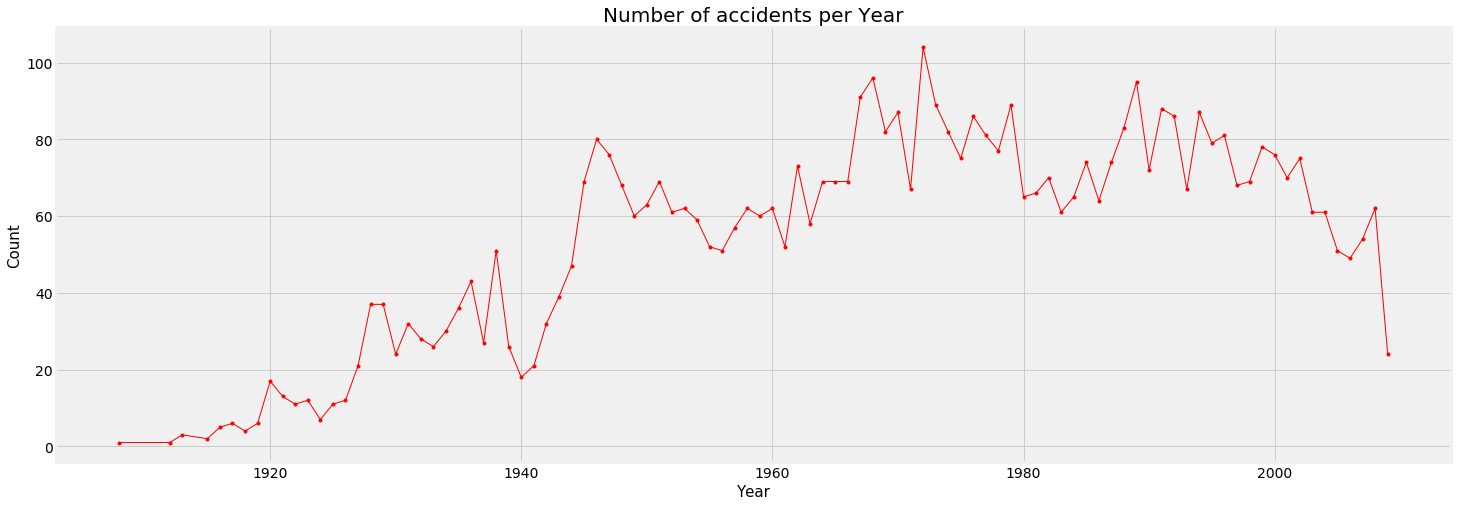

In [9]:
#Create Bar Chart showing Crashes per year
year_crashed = df.groupby("Year")[['Date']].count()
year_crashed = year_crashed.rename(columns={"Date" : "Count"})

#Label and format line Chart 
plt.figure(figsize=(25,8))
plt.style.use('fivethirtyeight')
plt.plot(year_crashed.index, 'Count', data=year_crashed, color='r', marker = ".", linewidth=1)
plt.title('Number of accidents per Year', loc='Center', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.show()


Text(0.5, 1.0, 'Count of crashes by Month')

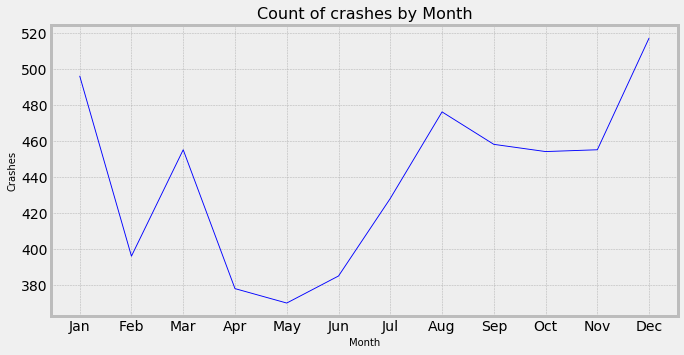

In [10]:

plt.figure(figsize=(10,5))
plt.style.use('bmh')
plt.plot(df.groupby("Month")[['Date']].count().index, 'Date', data=df.groupby("Month")[['Date']].count(), color='b',marker='', linewidth=.9)
plt.xticks(df.groupby("Month")[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Crashes', fontsize=10)
plt.title('Count of crashes by Month', loc='Center', fontsize=16)

In [ ]:
#Crashes by time of day


#plt.figure(figsize=(10,5))
#plt.style.use('bmh')
#plt.plot(df.groupby("Hour")[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.xlabel('Month', fontsize=10)
#plt.ylabel('Crashes', fontsize=10)
#plt.title('Count of crashes by Month', loc='Center', fontsize=16)

In [ ]:
#Crashes are more common in the winter 

In [ ]:
list = str(df.Location.tolist())

stopwords = set(STOPWORDS)
stopwords.add("off")
stopwords.add("Near")
stopwords.add("Over")
stopwords.add("of")
stopwords.add("on")
stopwords.add("'")
stopwords.add("-")
stopwords.add("\"")
stopwords.add(",")
stopwords.add(".")
stopwords.add(" -")
stopwords.add("Island")
wc = WordCloud(background_color = "black", max_words= 2500, stopwords=stopwords)
wc.generate(list)

plt.figure(figsize=(10,10))
plt.title('Location Word Cloud', loc='Center', fontsize=15)
plt.imshow(wc) 
plt.axis("off")
plt.show()

In [ ]:
#Military vs. Commercial comparison 

In [15]:
military_df = df.copy()
military_df["crashes"]= military_df.Operator.str.contains('MILITARY')
military_df = military_df.groupby('crashes')[['crashes']].count()
military_df.index = ['Commercial', 'Military']




In [16]:
military_df

,crashes
Commercial,4469
Military,781


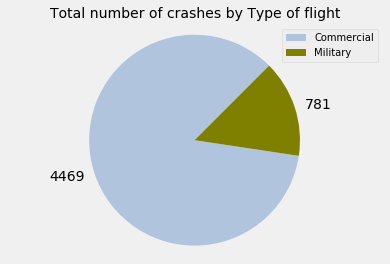

In [17]:
plt.pie(military_df.crashes, colors = ['lightsteelblue', 'olive'], labels=military_df.crashes, startangle=45)
plt.legend(military_df.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of crashes by Type of flight', loc='Center', fontsize=14)
plt.show()

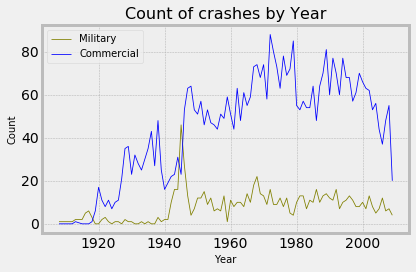

In [13]:
Temp = df.copy()
Temp['Military'] = Temp.Operator.str.contains('MILITARY')
Temp['Commercial'] = Temp.Military == False
Temp = Temp.loc[:, ['Year', 'Military', 'Commercial']]
Temp = Temp.groupby('Year')[['Military', 'Commercial']].aggregate(np.count_nonzero)


plt.plot(Temp.index, 'Military', data=Temp, color='olive', linewidth=.8)
plt.plot(Temp.index, 'Commercial', data=Temp, color='blue', linewidth=.8)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of crashes by Year', loc='Center', fontsize=16)
plt.tight_layout()
plt.show()

In [18]:
loc_list = Counter(df['Location'].dropna()).most_common(20)
locs = []
crashes = []
for loc in loc_list:
    locs.append(loc[0])
    crashes.append(loc[1])
dangerous_locations = pd.DataFrame({'Crashes in this location' : crashes}, index=locs)

dangerous_locations

,Crashes in this location
"SAO PAULO, BRAZIL",15
"MOSCOW, RUSSIA",15
"RIO DE JANEIRO, BRAZIL",14
"BOGOTA, COLOMBIA",13
"MANILA, PHILIPPINES",13
"ANCHORAGE, ALASKA",13
"NEW YORK, NEW YORK",12
"CAIRO, EGYPT",12
"CHICAGO, ILLINOIS",11
"NEAR MOSCOW, RUSSIA",9


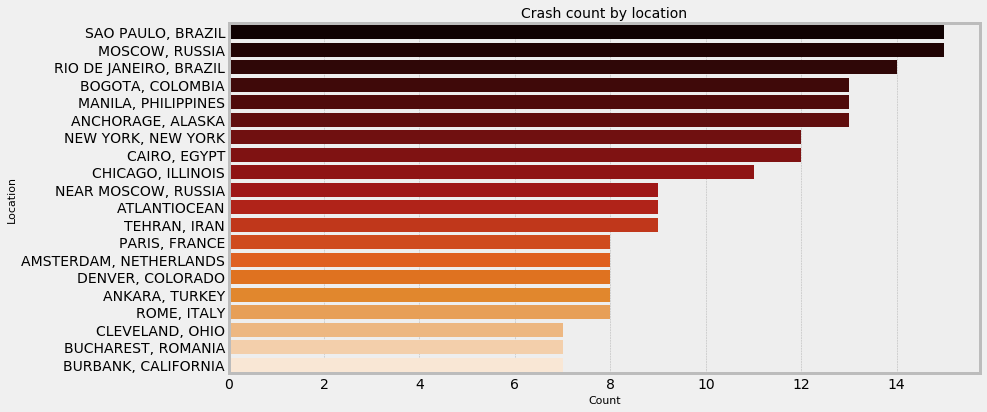

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(y=dangerous_locations.index, x="Crashes in this location", data=dangerous_locations, palette="gist_heat", orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Location', fontsize=11)
plt.title('Crash count by location', loc='Center', fontsize=14)
plt.show()